In [ ]:
!unzip Data.zip

In [ ]:
!unzip weather.zip

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import datetime
import seaborn as sns


In [ ]:
db_conn = sqlite3.connect("Data/FPA_FOD_20170508.sqlite")
wildfire = pd.read_sql_query ("select * from Fires where FIRE_YEAR>=2010", db_conn)
wildfire

In [ ]:
df = wildfire.groupby(["STATE"]).size().reset_index(name="size")
df

,STATE,size
0,AK,3364
1,AL,12864
2,AR,10548
3,AZ,13601
4,CA,44128
5,CO,9845
6,CT,1593
7,DC,13
8,DE,48
9,FL,17364


In [ ]:
test = wildfire[wildfire["STATE"] == "MT"].groupby(["FIRE_YEAR"]).size().reset_index(name="size")
test

,FIRE_YEAR,size
0,2010,1140
1,2011,1190
2,2012,1854
3,2013,1359
4,2014,1203
5,2015,1866


In [ ]:
def get_datetime(row):
  year = row["FIRE_YEAR"]
  doy = row["DISCOVERY_DOY"]
  return datetime.datetime.strptime(f"{year} {doy}", '%Y %j')

wildfire["datetime"] = wildfire.apply(lambda row: get_datetime(row), axis=1)

In [ ]:
pd1 = wildfire[(wildfire["STATE"] == "NC") & (wildfire["FIRE_YEAR"] == 2010)].sort_values("datetime")["datetime"]
pd1

61709   2010-01-01
65478   2010-01-02
61755   2010-01-02
61692   2010-01-03
61693   2010-01-03
           ...    
64411   2010-12-31
64028   2010-12-31
65427   2010-12-31
9088    2010-12-31
65338   2010-12-31
Name: datetime, Length: 4100, dtype: datetime64[ns]

In [ ]:
def get_round_lat(row):
  lat = row["LATITUDE"]
  return round(lat, 0)

def get_round_lon(row):
  lon = row["LONGITUDE"]
  return round(lon, 0)

In [ ]:
wildfire["lat"] = wildfire.apply(lambda row: get_round_lat(row), axis=1)
wildfire["lon"] = wildfire.apply(lambda row: get_round_lon(row), axis=1)

In [ ]:
frames = []
temp1 = pd.read_csv("weather/MT-10-1-6.csv", sep=",")
temp2 = pd.read_csv("weather/MT-10-6-12.csv", sep=",")
temp3 = pd.read_csv("weather/MT-11-1-6.csv", sep=",")
temp4 = pd.read_csv("weather/MT-11-6-12.csv", sep=",")
temp5 = pd.read_csv("weather/MT-12-1-6.csv", sep=",")
temp6 = pd.read_csv("weather/MT-12-6-12.csv", sep=",")
temp7 = pd.read_csv("weather/MT-13-1-6.csv", sep=",")
temp8 = pd.read_csv("weather/MT-13-6-12.csv", sep=",")
temp9 = pd.read_csv("weather/MT-14-1-6.csv", sep=",")
temp10 = pd.read_csv("weather/MT-14-6-12.csv", sep=",")
temp11 = pd.read_csv("weather/MT-15-1-6.csv", sep=",")
temp12 = pd.read_csv("weather/MT-15-6-12.csv", sep=",")
weather = pd.concat([temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10, temp11, temp12])

In [ ]:
weather["lat"] = weather.apply(lambda row: get_round_lat(row), axis=1)
weather["lon"] = weather.apply(lambda row: get_round_lon(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
weather = weather.drop_duplicates()

In [ ]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES,lat,lon
0,USC00247248,"RUDYARD 21 N, MT US",48.85390,-110.59690,914.4,2010-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,-111.0
1,USC00247248,"RUDYARD 21 N, MT US",48.85390,-110.59690,914.4,2010-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,-111.0
2,USC00247248,"RUDYARD 21 N, MT US",48.85390,-110.59690,914.4,2010-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,-111.0
3,USC00247248,"RUDYARD 21 N, MT US",48.85390,-110.59690,914.4,2010-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,-111.0
4,USC00247248,"RUDYARD 21 N, MT US",48.85390,-110.59690,914.4,2010-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,-111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108516,USC00245340,"MALTA 35 S, MT US",47.84177,-107.95563,797.1,2015-12-27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,-108.0
108517,USC00245340,"MALTA 35 S, MT US",47.84177,-107.95563,797.1,2015-12-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,-108.0
108518,USC00245340,"MALTA 35 S, MT US",47.84177,-107.95563,797.1,2015-12-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,-108.0
108519,USC00245340,"MALTA 35 S, MT US",47.84177,-107.95563,797.1,2015-12-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,-108.0


In [ ]:
weather["DATE"]

0         2010-01-01
1         2010-01-02
2         2010-01-03
3         2010-01-04
4         2010-01-05
             ...    
108516    2015-12-27
108517    2015-12-28
108518    2015-12-29
108519    2015-12-30
108520    2015-12-31
Name: DATE, Length: 1171507, dtype: object

In [ ]:
wildfire["datetime"]

0        2010-05-19
1        2010-06-08
2        2010-06-12
3        2010-06-14
4        2010-07-11
            ...    
450229   2015-09-26
450230   2015-10-05
450231   2015-05-02
450232   2015-10-14
450233   2015-03-14
Name: datetime, Length: 450234, dtype: datetime64[ns]

In [ ]:
weather["DATE"] = pd.to_datetime(weather["DATE"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weather["DATE"]

0        2010-01-01
1        2010-01-02
2        2010-01-03
3        2010-01-04
4        2010-01-05
            ...    
108516   2015-12-27
108517   2015-12-28
108518   2015-12-29
108519   2015-12-30
108520   2015-12-31
Name: DATE, Length: 1171507, dtype: datetime64[ns]

In [ ]:
merged_df = wildfire.merge(weather, how="left", left_on=["lat", "lon", "datetime"], right_on=["lat", "lon", "DATE"])

In [ ]:
# merged_df[(merged_df["lat"] == 48.0) & (merged_df["lon"]==-108.0)]["TMIN"]
merged_df

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,WT16,WT16_ATTRIBUTES,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,1067488,1302561,CDF_2010_56_2229_001566,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1067489,1302566,CDF_2010_56_2229_001806,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1067490,1302568,CDF_2010_56_2229_001857,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1067491,1302570,CDF_2010_56_2229_001897,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1067492,1302576,CDF_2010_56_2229_002326,NONFED,ST-CACDF,ST/C&L,USCABEU,San Benito-Monterey Unit,CABEU,CDF - San Benito-Monterey Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552264,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552265,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552266,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552267,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.to_csv("weather_forest_fire.csv")

In [ ]:
merged_df["FIRE_SIZE"]

0         70.00
1          0.50
2          0.10
3          0.10
4          1.00
          ...  
552264     0.01
552265     0.20
552266     0.10
552267     2.00
552268     0.10
Name: FIRE_SIZE, Length: 552269, dtype: float64

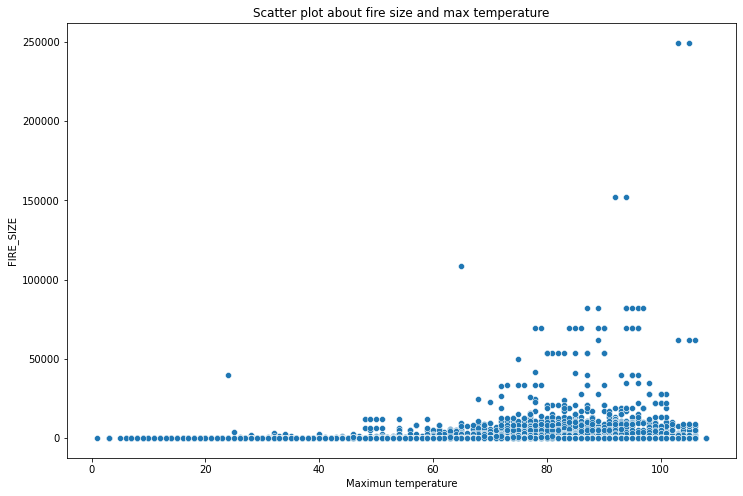

In [ ]:
# scatter plot about fire size and max temperature
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x="TMAX", y="FIRE_SIZE")
plt.xlabel("Maximun temperature")
plt.title("Scatter plot about fire size and max temperature")
plt.show()

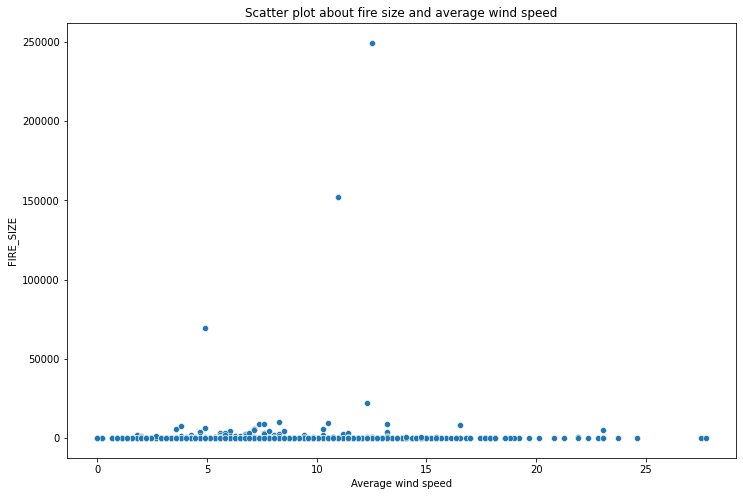

In [ ]:
# scatter plot about fire size and wind speed
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x="AWND", y="FIRE_SIZE")
plt.xlabel("Average wind speed")
plt.title("Scatter plot about fire size and average wind speed")
plt.show()